# Music Recommendation Engine

The music dataset is firstly cleaned and feature extracted for music recommendation based on matrix decomposition approach.

- Music data processing

Read the music dataset and count its metrics, select the valuable information as our features

- Recommendation based on music similarity 

Select the similarity calculation method to calculate the recommendation result by similarity

- Recommendation based on SVD matrix decomposition

Use matrix decomposition method to get recommendation results quickly and efficiently

In [1]:
import pandas as pd
import numpy as np
import time
import sqlite3

data_home = './'

Some of our data are database files and we use the sqlite3 toolkit to help us read them.

For different formats of data read_csv has many parameters to choose from, such as delimiters and column names:

## Read the data

Extract users, songs, and number of plays

In [2]:
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

Check the data size

In [3]:
triplet_dataset.shape

(48373586, 3)

Check the data memory usage and format of each indicator

In [4]:
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user        object
 1   song        object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


Original data:

In [5]:
triplet_dataset.head(n=10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


## For each user, count his/her total number of plays separately

The data includes the user id, the song id, and the number of times the song has been played by the user.

Once we have the basic data, we can also count the metrics about users and songs, for example, for each user, we can count the total number of plays for each user:

In [6]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        #find the current user
        user = line.split('\t')[0]
        #get the amount of play
        play_count = int(line.split('\t')[2])
        #If the user information is already in the dictionary, add the current play count to it
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
# Count the total amount of plays for each user
output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
#Convert to df format
play_count_df = pd.DataFrame(output_list)
#Sort it
play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)

Constructing a dictionary to count the total number of plays by different users requires us to traverse the dataset. When our data set is large, each step of the operation may take a long time, the subsequent operation if a little carelessness may have to start over again, which is not worth the loss, so it is better to save the intermediate results. 

Since we have converted the results to df format, we cab directly using the to_csv () function to complete the save operation.

In [7]:
play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

## For each song, count its total number of plays

In [8]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        #find the current song
        song = line.split('\t')[1]
        #count the number of play times
        play_count = int(line.split('\t')[2])
        #count the total number of plays
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
#convert to df
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)

In [9]:
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

## Take a look at the current ranking

In [10]:
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
play_count_df.head(n =10)

,user,play_count
0,093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
1,119b7c88d58d0c6eb051365c103da5caf817bea6,9884
2,3fa44653315697f42410a30cb766a4eb102080bb,8210
3,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
4,d7d2d888ae04d16e994d6964214a1de81392ee04,6494
5,4ae01afa8f2430ea0704d502bc7b57fb52164882,6472
6,b7c24f770be6b802805ac0e2106624a517643c17,6150
7,113255a012b2affeab62607563d03fbdf31b08e7,5656
8,6d625c6557df84b60d90426c0116138b617b9449,5620
9,99ac3d883681e21ea68071019dba828ce76fe94d,5602


In [11]:
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
song_count_df.head(10)

,song,play_count
0,SOBONKR12A58A7A7E0,726885
1,SOAUWYT12A81C206F1,648239
2,SOSXLTC12AF72A7F54,527893
3,SOFRQTD12A81C233C0,425463
4,SOEGIYH12A6D4FC0E3,389880
5,SOAXGDH12A8C13F8A1,356533
6,SONYKOW12AB01849C9,292642
7,SOPUCYA12A8C13A694,274627
8,SOUFTBI12AB0183F65,268353
9,SOVDSJC12A58A7A271,244730


The most popular song has 726,885 plays.

This music data set is very large, so we intercepted the data set based on the play index, considering the time consumption of the execution process and the sparsity of the matrix. Because some registered users may just used the platform for a while and then stop logging in, these users will not contribute to our modeling, but increase the sparsity of the matrix. The same situation is also applied for songs, where some songs may not be listened at all. Since we have already sorted the users and song plays, we selected the top 100,000 active users and top 30,000 most popular songs from the whole dataset

## Take some of the data (in order of size, these should be more important data), as our experimental data

In [12]:
#Playback of 100,000 users as a percentage of overall dataset
total_play_count = sum(song_count_df.play_count)
print ((float(play_count_df.head(n=100000).play_count.sum())/total_play_count)*100)
play_count_subset = play_count_df.head(n=100000)

40.8807280500655


In [13]:
(float(song_count_df.head(n=30000).play_count.sum())/total_play_count)*100

78.39315366645269

In [14]:
song_count_subset = song_count_df.head(n=30000)

The top 30,000 songs account for 78.39% of the overall play count.

Now that we have these 100,000 loyal users and 30,000 songs, the next step is to clean the original data set, that is, to eliminate data that does not contain these users as well as songs in the original data set.

In [15]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

Filter out other user data

In [16]:
#Read the original dataset
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt',sep='\t', 
                              header=None, names=['user','song','play_count'])
#Only keep the data with these 100,000 users, and filter out the rest
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset) ]
del(triplet_dataset)
#Keep only the data of these 30,000 songs, and filter out the rest
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [17]:
triplet_dataset_sub_song.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song.csv', index=False)

Check the data size again

In [18]:
triplet_dataset_sub_song.shape

(10774558, 3)

The number of samples at this time is less than 1/4 of the original, but we filtered out the samples are sparse data which is not conducive to modeling. So when we get the data for data cleaning and pre-processing work is still very necessary, not only to improve the speed of calculation, but also affect the final results.

In [19]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


## Add detailed information of the songs

The only data we have so far is the number of plays, which is not enough. For each song, there should normally be a detailed information, such as artist, release time, theme, etc. We gonna need another dataset to extract these information. 

Here, we will read this dataset through the sqlite toolkit:

In [20]:
conn = sqlite3.connect(data_home+'track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [21]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [22]:
track_metadata_df_sub.to_csv(path_or_buf=data_home+'track_metadata_df_sub.csv', index=False)

In [23]:
track_metadata_df_sub.shape

(30447, 14)

## The data we have right now:

In [24]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song.csv',encoding = "ISO-8859-1")
track_metadata_df_sub = pd.read_csv(filepath_or_buffer=data_home+'track_metadata_df_sub.csv',encoding = "ISO-8859-1")

In [25]:
triplet_dataset_sub_song.head()

,user,song,play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [26]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
1,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
2,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
3,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
4,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


## Perform data cleaning

In [27]:
# remove useless information
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
# remove duplicates
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
# Integrate this music information data with our previous playback data
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
# rename the column
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace=True)

In [28]:
# remove some other useless information
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

## Now we get a more complete dataset

In [29]:
triplet_dataset_sub_song_merged.head(n=10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


Now the data looks much neater, it not only includes the number of plays of a song, but also the name and album, as well as the name of the artist and the release date.

However, we only have a general understanding of the meaning of each indicator in the data, but we have not yet analyzed when and where the information is useful. To address the cold start problem, that is, a new user comes and we don't know what songs to recommend, now it's the time to use the chart list. It is possible to count which are the most popular songs and artists:

### Showing the most popular songs

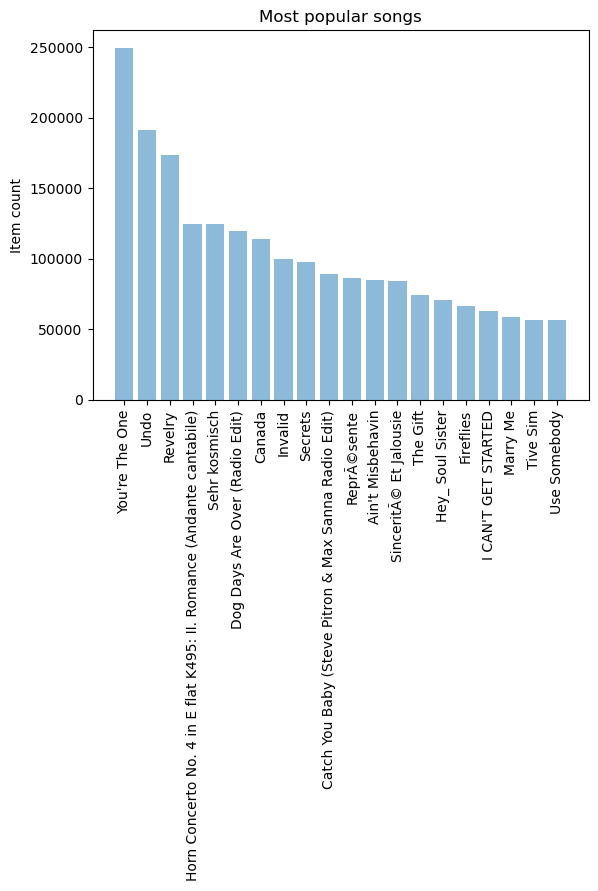

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#Total number of plays by song name
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
#sort the results
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(n=20)

#Convert to list format for easy drawing
objects = (list(popular_songs_top_20['title']))
#set the graph
y_pos = np.arange(len(objects))
#corresponding results
performance = list(popular_songs_top_20['listen_count'])
#draw time
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular songs')
 
plt.show()

The most popular songs are shown here, and the groupby function makes it easy to count the plays for each song, and we are looking for the total number of plays. This ranking data can then be used as the most popular songs to recommend to users (especially for new users).

In the same way we can also count the numer of plays of albums and artists separately:

## The most popular releases

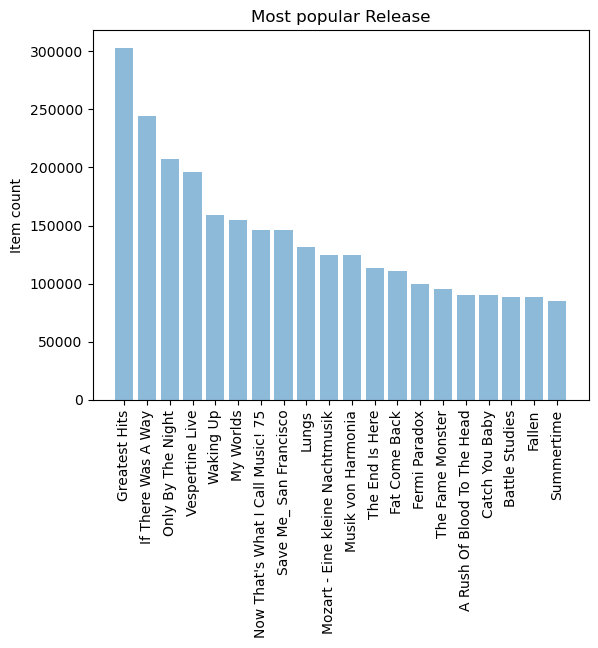

In [31]:
#Total number of plays by album name
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
#sort
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_release_top_20['release']))
y_pos = np.arange(len(objects))
performance = list(popular_release_top_20['listen_count'])
#draw time
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Release')
 
plt.show()

## The most popular artists

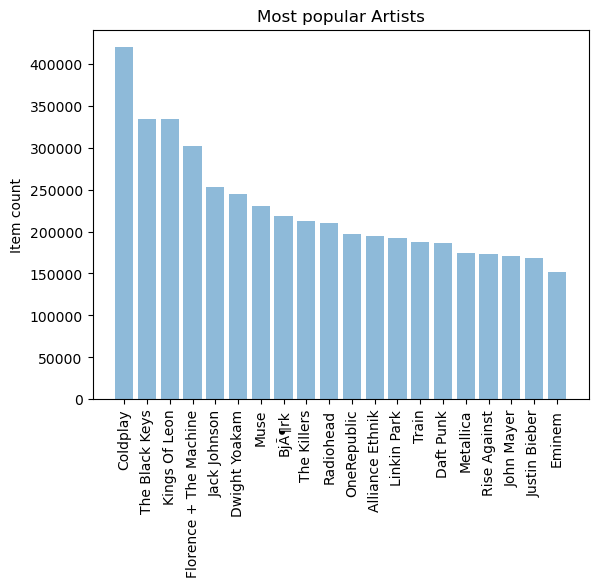

In [32]:
#Total number of plays by artist
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
#sort
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_artist_top_20['artist_name']))
y_pos = np.arange(len(objects))
performance = list(popular_artist_top_20['listen_count'])
#draw time
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Artists')
 
plt.show()

## Distribution of the amount of songs played by users

In [33]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(
by='title',ascending = False)
user_song_count_distribution.title.describe()

count    99996.000000
mean       107.749890
std         79.742561
min          1.000000
25%         53.000000
50%         89.000000
75%        141.000000
max       1189.000000
Name: title, dtype: float64

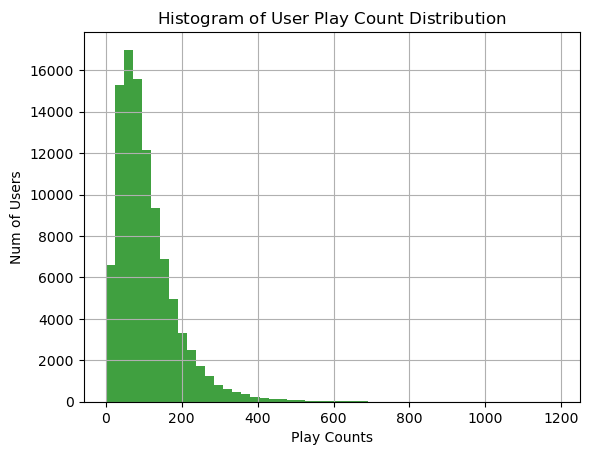

In [34]:
x = user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title(r'$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $')
plt.grid(True)
plt.show()

## Building the recommendation system

In [35]:
import Recommenders as Recommenders
from sklearn.model_selection import train_test_split

## Leaderboard recommendation for new users to solve the cold start problem

Create a function that requires us to pass in the raw data, the user column name, the metrics to be counted (e.g. by song name, artist name, album name. Select which metric to count to get the list):

In [36]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size = 0.40, random_state=0)

In [37]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010


In [38]:
def create_popularity_recommendation(train_data, user_id, item_id):
    #Statistics on its playback according to specified characteristics: song name, album name, artist name
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    #For visual presentation, we express the results in terms of scores
    train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    #sort the chart
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
    
    #Add a ranking level to indicate the priority of its recommendations
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
    #Returns a specified number of recommendations
    popularity_recommendations = train_data_sort.head(20)
    return popularity_recommendations

In [39]:
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','title')

Fetch the recommendation results

In [40]:
recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0


Returned a list of the top 20 songs based on number of plays scores

## Recommendation based on song similarity

To speed up the running, a portion of the data was selected for the experiment.

In [41]:
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [42]:
triplet_dataset_sub_song_merged_sub.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


### Calculate similarity to get recommendation results

In [43]:
import Recommenders as Recommenders
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size = 0.30, random_state=0)
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
user_id = list(train_data.user)[7]
user_items = is_model.get_user_items(user_id)

First of all, we imported Recommenders, which includes all the functions we will use next. Since the amount of code for the next computation is large, it is troublesome to show it directly in the notebook, so we wrote our own .py file where all the actual computation operations are done.

First, if we want to make recommendations for a user, we must get the songs he/she has listened to, and then compare the songs that have been listened to with the songs in the whole dataset to see which songs are similar to the ones the user has listened to, and recommend the ones that are similar. For example, if the current user has listened 66 songs and there are 4879 songs in the entire dataset, all we have to do is to build a matrix of [66,4879], where each value represents the similarity between each song the user has listened to and each song in the dataset. Here the Jaccard similarity coefficient is used and the meaning of [i,j] in the matrix is the ith song that the user has listened to which of these songs have been listened to by which people.

If two songs are very similar, then their audiences should be the same and the intersection/combination ratio should be larger, if two songs have little correlation, their values should be smaller.

In the code, the value of each position in the matrix [66,4879] is calculated, and in the final recommendation we need to calculate the Jaccard value for each song to be recommended in the dataset with all the songs that the user has listened to. For example, song j needs to calculate its value with the 66 songs that the user has listened to, and finally whether the recommended score value has to be processed, i.e., the 66 values are added together and finally an average is obtained to represent the recommendation score of the song.

In [44]:
#Execute recommendation
is_model.recommend(user_id)

No. of unique songs for the user: 66
no. of unique songs in the training set: 4879
Non zero values in cooccurence_matrix :290327


,user_id,song,score,rank
0,a974fc428825ed071281302d6976f59bfa95fe7e,Put Your Head On My Shoulder (Album Version),0.026334,1
1,a974fc428825ed071281302d6976f59bfa95fe7e,The Strength To Go On,0.025176,2
2,a974fc428825ed071281302d6976f59bfa95fe7e,Come Fly With Me (Album Version),0.024447,3
3,a974fc428825ed071281302d6976f59bfa95fe7e,Moondance (Album Version),0.024118,4
4,a974fc428825ed071281302d6976f59bfa95fe7e,Kotov Syndrome,0.023311,5
5,a974fc428825ed071281302d6976f59bfa95fe7e,Use Somebody,0.023104,6
6,a974fc428825ed071281302d6976f59bfa95fe7e,Lucky (Album Version),0.022930,7
7,a974fc428825ed071281302d6976f59bfa95fe7e,Secrets,0.022889,8
8,a974fc428825ed071281302d6976f59bfa95fe7e,Clocks,0.022562,9
9,a974fc428825ed071281302d6976f59bfa95fe7e,Sway (Album Version),0.022359,10


## Singular Value Decomposition (SVD) based recommendations

The SVD decomposition of the matrix will yield USV

<img src="2.png" style="width:500px;height:380px;float:left"><img src="3.png" style="width:400px;height:200px;float:left">

Recalculate the result of U*S*V to get A2 to compare the difference between A2 and A. It looks like there is a difference, but it's not big, so we can approximate it instead

<img src="4.png" style="width:330px;height:220px;float:left">
<img src="5.png" style="width:330px;height:220px;float:left">

The data we need in SVD is the user's rating of the song, but our current dataset only has the user's playing of the song and not the actual rating value, so we have to define the user's rating value for each song by ourselves. If a user likes a song, it should be played more often, and if they don't like a song, it should be played less often.

The user's score value for the song is defined as: the number of times the user played the song/total number of times the user played all songs.

In [45]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'},inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged,triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,release,artist_name,year,total_listen_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004,329
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,329
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0,329
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993,329
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0,329


In [46]:
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']

In [47]:
triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.user =='d6589314c0a9bcbca4fee0c93b14bc402363afea'][['user','song','listen_count','fractional_play_count']].head()

,user,song,listen_count,fractional_play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,0.036474
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,0.003040
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,0.003040
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,0.003040
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,0.021277


In [48]:
from scipy.sparse import coo_matrix

small_set = triplet_dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)
user_codes['us_index_value'] = list(user_codes.index)
small_set = pd.merge(small_set,song_codes,how='left')
small_set = pd.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)

In [49]:
data_sparse

<99996x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 10774558 stored elements in COOrdinate format>

First, we group the users and calculate the total number of plays for each user, then we divide the total number of plays for each song to get the score of each song, and the last column feature fractional_play_count is the user's rating value for each song.

There are some small problems that need to be dealt with here, both the user ID and song ID in the original data is a long string, which is not very convenient to express and needs to be re-indexed.

In [50]:
user_codes[user_codes.user =='2a2f776cbac6df64d6cb505e7e834e01684673b6']

,user_index,user,us_index_value
27516,2981434,2a2f776cbac6df64d6cb505e7e834e01684673b6,27516


### Using SVD to perform matrix decomposition

After the matrix is constructed, we need to perform the SVD matrix decomposition. Here we also need some additional toolkits to help us complete the calculation.

In [51]:
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [52]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

When executing SVD, we need to specify an additional metric K value, which means we choose the top number of eigenvalues to be the approximate representative, that is, the number in the S matrix. If the K value is larger, the overall computational efficiency will be slower but will be closer to the real result.

In [53]:
K=50
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)

Here we choose a K value equal to 50, where PID indicates the part of the song we selected at the beginning and UID indicates the part of the user we selected.

Next, select the user to be tested:

uTest = [4,5,6,7,8,873,23]

In [54]:
uTest = [4,5,6,7,8,873,23]

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

In [58]:
for user in uTest:
    print("Current user id to be recommended {}". format(user))
    rank_value = 1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("Recommendation id： {} Recommended song： {} Artist： {}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1

Current user id to be recommended 27513
Recommendation id： 1 Recommended song： Master Of Puppets Artist： Metallica
Recommendation id： 2 Recommended song： Garden Of Eden Artist： Guns N' Roses
Recommendation id： 3 Recommended song： Bring Me To Life Artist： Evanescence
Recommendation id： 4 Recommended song： Kryptonite Artist： 3 Doors Down
Recommendation id： 5 Recommended song： Make Her Say Artist： Kid Cudi / Kanye West / Common
Recommendation id： 6 Recommended song： Night Village Artist： Deep Forest
Recommendation id： 7 Recommended song： Savior Artist： Rise Against
Recommendation id： 8 Recommended song： Good Things Artist： Rich Boy / Polow Da Don / Keri Hilson
Recommendation id： 9 Recommended song： Bleed It Out [Live At Milton Keynes] Artist： Linkin Park
Recommendation id： 10 Recommended song： Uprising Artist： Muse


Each user was given its corresponding recommendation result and the results were sorted by score value.

In [59]:
uTest = [27513]
#Get estimated rating for test user
print("Predictied ratings:")
uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

Predictied ratings:


In [61]:
for user in uTest:
    print("Current user id to be recommended {}". format(user))
    rank_value = 1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("Recommendation id： {} Recommended song： {} Artist： {}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1

Current user id to be recommended 27513
Recommendation id： 1 Recommended song： Master Of Puppets Artist： Metallica
Recommendation id： 2 Recommended song： Garden Of Eden Artist： Guns N' Roses
Recommendation id： 3 Recommended song： Bring Me To Life Artist： Evanescence
Recommendation id： 4 Recommended song： Kryptonite Artist： 3 Doors Down
Recommendation id： 5 Recommended song： Make Her Say Artist： Kid Cudi / Kanye West / Common
Recommendation id： 6 Recommended song： Night Village Artist： Deep Forest
Recommendation id： 7 Recommended song： Savior Artist： Rise Against
Recommendation id： 8 Recommended song： Good Things Artist： Rich Boy / Polow Da Don / Keri Hilson
Recommendation id： 9 Recommended song： Bleed It Out [Live At Milton Keynes] Artist： Linkin Park
Recommendation id： 10 Recommended song： Uprising Artist： Muse
